In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import mpld3
from mpld3 import plugins
import io
import base64

In [2]:
df = pd.read_csv('DataSet/GlobalLandTemperaturesByCountry.csv', delimiter=',')

In [3]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [4]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [5]:
df_country = df.Country.unique()

In [6]:
len(df_country)

243

In [7]:
df_c = df.drop('AverageTemperatureUncertainty', axis=1)

In [8]:
df_c = df_c[df_c.Country == "Cameroon"]

In [9]:
df_c = df_c.drop('Country',axis=1)

In [10]:
df_c.index = pd.to_datetime(df_c.dt)

In [11]:
df_c = df_c.drop('dt', axis=1)

In [12]:
df_c

,AverageTemperature
dt,
1856-01-01,23.696
1856-02-01,24.302
1856-03-01,25.557
1856-04-01,25.104
1856-05-01,24.169
...,...
2013-05-01,25.411
2013-06-01,24.694
2013-07-01,23.955


In [13]:
df_c = df_c.loc['1950-01-01':]

In [14]:
df_c.head()

,AverageTemperature
dt,
1950-01-01,24.170
1950-02-01,24.678
1950-03-01,26.028
1950-04-01,25.891
1950-05-01,25.215


In [15]:
df_c[df_c.isnull()]
#df_c.isnull().sum()

,AverageTemperature
dt,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [16]:
df_c = df_c.sort_index()

In [17]:
df_c.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=765, freq=None)

In [18]:
df_c.AverageTemperature.fillna(method='pad', inplace=True)

In [19]:
df_c[df_c.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [20]:
df_c.describe()

,AverageTemperature
count,765.000000
mean,24.635908
std,1.107379
min,22.453000
25%,23.805000
50%,24.315000
75%,25.427000
max,27.722000


In [21]:
df_c

,AverageTemperature
dt,
1950-01-01,24.170
1950-02-01,24.678
1950-03-01,26.028
1950-04-01,25.891
1950-05-01,25.215
...,...
2013-05-01,25.411
2013-06-01,24.694
2013-07-01,23.955


In [22]:
df_c['Ticks'] = range(0,len(df_c.index.values))

In [23]:
df_c.head(10)

,AverageTemperature,Ticks
dt,,
1950-01-01,24.170,0
1950-02-01,24.678,1
1950-03-01,26.028,2
1950-04-01,25.891,3
1950-05-01,25.215,4
1950-06-01,24.876,5
1950-07-01,23.424,6
1950-08-01,22.979,7
1950-09-01,23.484,8


In [24]:
df_c.tail(10)

,AverageTemperature,Ticks
dt,,
2012-12-01,24.504,755
2013-01-01,25.382,756
2013-02-01,26.610,757
2013-03-01,26.750,758
2013-04-01,26.156,759
2013-05-01,25.411,760
2013-06-01,24.694,761
2013-07-01,23.955,762
2013-08-01,23.503,763


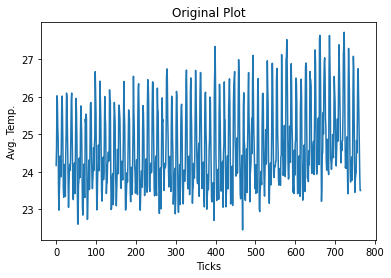

In [25]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_c);

In [26]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

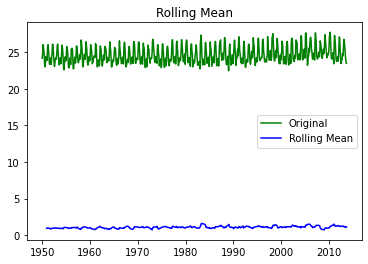

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.60017919481465, 0.00012907144067912917, 18, 746, {'1%': -3.439146171679794, '5%': -2.865422101274577, '10%': -2.568837245865348}, 962.0690597938938)
df_output: 
 Test Statistic                  -4.600179
p-value                          0.000129
#Lags Used                      18.000000
Number of Observations Used    746.000000
dtype: float64
Test Statistic                  -4.600179
p-value                          0.000129
#Lags Used                      18.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


In [27]:
stationarity_check(df_c.AverageTemperature)

In [28]:
print(df_c)

            AverageTemperature  Ticks
dt                                   
1950-01-01              24.170      0
1950-02-01              24.678      1
1950-03-01              26.028      2
1950-04-01              25.891      3
1950-05-01              25.215      4
...                        ...    ...
2013-05-01              25.411    760
2013-06-01              24.694    761
2013-07-01              23.955    762
2013-08-01              23.503    763
2013-09-01              23.503    764

[765 rows x 2 columns]


In [29]:
#df_c.iloc[:,0]  = pd.to_datetime(df_c.iloc[:,0]) 
#df_c.iloc[:,0] = np.nan
#df_c.iloc[:,1]= pd.to_datetime(df_c.iloc[:,1],unit='ns')
#df_c.iloc[:, 1] = pd.to_datetime(df_c.iloc[:, 1], errors = 'coerce')
#print(df_c)

In [30]:
df_c['Roll_Mean'] = df_c.AverageTemperature.rolling(12).std()

In [31]:
df_c.head(40)

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1950-01-01,24.170,0,NaN
1950-02-01,24.678,1,NaN
1950-03-01,26.028,2,NaN
1950-04-01,25.891,3,NaN
1950-05-01,25.215,4,NaN
1950-06-01,24.876,5,NaN
1950-07-01,23.424,6,NaN
1950-08-01,22.979,7,NaN
1950-09-01,23.484,8,NaN


In [32]:
df_c.tail()

,AverageTemperature,Ticks,Roll_Mean
dt,,,
2013-05-01,25.411,760,1.124596
2013-06-01,24.694,761,1.114160
2013-07-01,23.955,762,1.060862
2013-08-01,23.503,763,1.094851
2013-09-01,23.503,764,1.138020


In [33]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

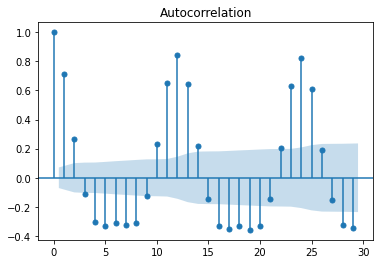

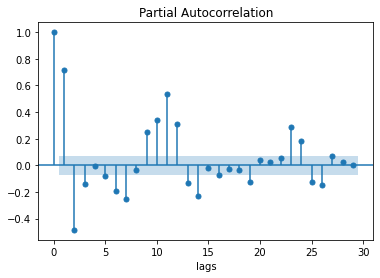

In [34]:
plot_acf(df_c.AverageTemperature)
plot_pacf(df_c.AverageTemperature)
plt.xlabel('lags')
plt.show()

In [35]:
from statsmodels.tsa.arima_model import ARIMA

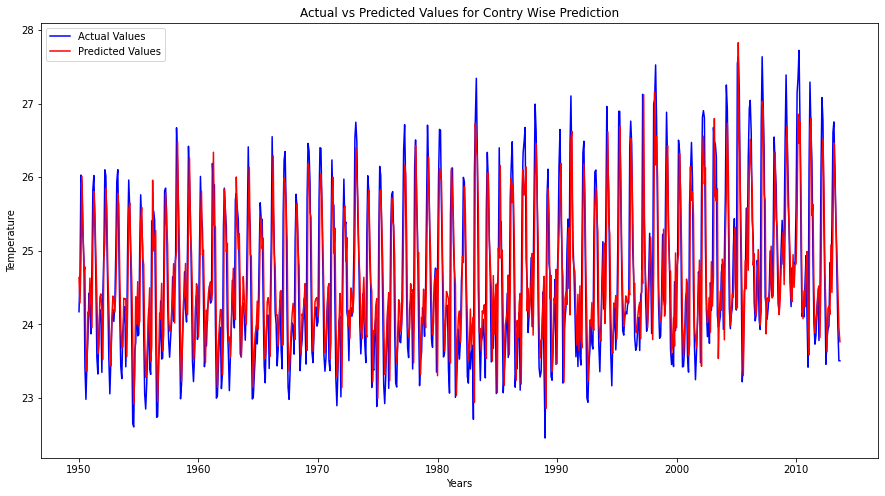

In [36]:
model = ARIMA(df_c.AverageTemperature, order=(1, 0, 2),freq="MS")  
results_MA = model.fit()  
#plt.plot(df_c.AverageTemperature)
#plt.plot(results_MA.fittedvalues, color='red')
#plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_c.AverageTemperature)**2).mean()))
#plt.show()


fig = plt.figure(figsize=(15, 8))
ax = plt.plot(df_c.AverageTemperature, color = 'blue',label="Actual Values")
l = plt.plot(results_MA.fittedvalues, color = 'red',label="Predicted Values")
plt.title("Actual vs Predicted Values for Contry Wise Prediction")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.show()
#plt.savefig("Actual vs Predicted Values for Contry Wise Prediction")
#mpld3.plugins.connect(fig, mpld3.plugins.LineLabelTooltip(ax[0]))
html_str = mpld3.fig_to_html(fig)
Html_file= open("map.html","w")
Html_file.write(html_str)
Html_file.close()


In [37]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                  765
Model:                     ARMA(1, 2)   Log Likelihood                -808.078
Method:                       css-mle   S.D. of innovations              0.695
Date:                Fri, 16 Jul 2021   AIC                           1626.156
Time:                        18:00:27   BIC                           1649.356
Sample:                    01-01-1950   HQIC                          1635.087
                         - 09-01-2013                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       24.6333      0.078    316.340      0.000      24.481      24.786
ar.L1.AverageTemperature     0.3759      0.054      6.962      0.000       0.270       0.482
ma.L1.AverageTemperature     0.6362      0.053     11.969      0.000       0.532       0.740
ma.L2.AverageTemperature     0.3001      0.039      7.660      0.000       0.223       0.377
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6605           +0.0000j            2.6605            0.0000
MA.1           -1.0597           -1.4862j            1.8253           -0.3486
MA.2           -1.0597           +1.4862j            1.8253            0.3486
-----------------------------------------------------------------------------
"""

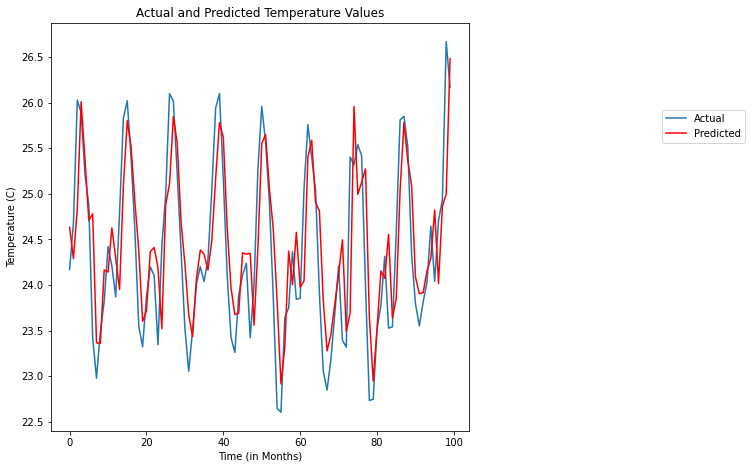

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(7.5,7.5))
plt.plot(list(df_c.AverageTemperature)[:100], label="Actual")
plt.plot(list(results_MA.fittedvalues)[:100], 'r', label="Predicted")

plt.xlabel("Time (in Months)")
plt.ylabel("Temperature (C)")
#plt.xticks(df_c.Ticks,list(results_MA.fittedvalues))
plt.title("Actual and Predicted Temperature Values")

plt.legend(loc='upper left', bbox_to_anchor=(1.45, 0.8))
plt.show()
plt.savefig("Actual vs Predicted Values for Contry Wise Prediction in Simple Form")

In [39]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [40]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [41]:
predictions = results_MA.predict('01/01/1950','04/01/2262')

In [42]:
print(predictions)

1950-01-01    24.633285
1950-02-01    24.289286
1950-03-01    24.838186
1950-04-01    26.010931
1950-05-01    25.383161
                ...    
2261-12-01    24.633285
2262-01-01    24.633285
2262-02-01    24.633285
2262-03-01    24.633285
2262-04-01    24.633285
Freq: MS, Length: 3748, dtype: float64


In [43]:
print(predictions['01-01-2262'])

24.6332853325451


In [44]:
#print(results_MA.predict('02/01/1970'))

In [46]:
print(predictions['07-01-2021'])

24.6332853325451
